In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
import numpy as np

In [ ]:
# Load the stochastic results from the csv and create a DataFrame from it.
df = pd.read_csv("stochastic_results_2.csv")
df['val_of_deterministic_soln'] = df['opt_val'] - df['VSS']
df['rel_VSS'] = df['VSS']/(df['opt_val']+df['VSS'])
# rel_VSS is the additional value of the stochastic solution as a proportion of
# the DETERMINISTIC solution, i.e. stochastic solution is 100*(rel_VSS)% better.

In [ ]:
# Select the trials we ran for 40 nodes and 100 scenarios with a MIPGAP of 0.05.
D = 40 # dataset
N = 100 # nb_scenarios
G = 0.05 # gap

dataset_selector = df['dataset'] == D
nb_scenarios_selector = df['nb_scenarios'] == N
gap_selector = df['miprelstop_setting'] == G

# Probabilities of dropouts:
P_list = [0.050, 0.075, 0.100]


In [ ]:
# Store the data for calculating the VSS etc. in an easily usable form:
selected_deterministic_value = []
selected_VSS_data = []
selected_time_taken = []
for P in P_list:
    P_selector = df['P_dropout_pairs'] == P
    selected_df = df[dataset_selector & nb_scenarios_selector & P_selector & gap_selector]
    selected_deterministic_value.append(selected_df['val_of_deterministic_soln'])
    selected_VSS_data.append(selected_df['rel_VSS'])
    selected_time_taken.append(selected_df['time'])

In [18]:
# Confidence intervals for the VSS (against 100 scenarios):
for i in range(len(selected_deterministic_value)):
    mean = selected_VSS_data[i].mean()
    std = selected_VSS_data[i].std()
    lower = mean - 1.96*std
    upper = mean + 1.96*std

    print(f"Dropout probability: {P_list[i]*100}% ")
    print("VSS evaluated against 100 scenarios")
    print(f"Mean: {mean*100:.2f}%")
    print(f"CI: [{lower*100:.2f}%,{upper*100:.2f}%]")
    print(f"Uncertainty: {(upper-mean)*100:.2f} % points")
    print("")

Dropout probability: 5.0% 
VSS evaluated against 100 scenarios
Mean: 5.65%
CI: [1.09%,10.21%]
Uncertainty: 4.56 % points

Dropout probability: 7.5% 
VSS evaluated against 100 scenarios
Mean: 10.71%
CI: [4.14%,17.28%]
Uncertainty: 6.57 % points

Dropout probability: 10.0% 
VSS evaluated against 100 scenarios
Mean: 15.15%
CI: [9.93%,20.36%]
Uncertainty: 5.22 % points



In [19]:
# Uncertainty in the performance of the deterministic solution against 100 scenarios
for i in range(len(selected_deterministic_value)):
    mean = selected_deterministic_value[i].mean()
    std = selected_deterministic_value[i].std()
    lower = mean - 1.96*std
    upper = mean + 1.96*std


    print(f"Dropout probability: {P_list[i]*100}% ")
    print("Value of the deterministic solution evaluated against 100 scenarios")
    print(f"Mean: {mean:.2f}")
    print(f"CI: [{lower:.2f},{upper:.2f}]")
    print(f"Uncertainty (as % of mean): {(upper-mean)/mean*100:.2f} %")
    print("")

Dropout probability: 5.0% 
Value of the deterministic solution evaluated against 100 scenarios
Mean: 933.06
CI: [839.88,1026.24]
Uncertainty (as % of mean): 9.99 %

Dropout probability: 7.5% 
Value of the deterministic solution evaluated against 100 scenarios
Mean: 782.71
CI: [671.19,894.23]
Uncertainty (as % of mean): 14.25 %

Dropout probability: 10.0% 
Value of the deterministic solution evaluated against 100 scenarios
Mean: 662.63
CI: [583.10,742.16]
Uncertainty (as % of mean): 12.00 %



In [24]:
# Make the percentages appear as % (not proportions) for the VSS.
boxes = [selected_VSS_data[i]*100 for i in range(len(selected_VSS_data))]

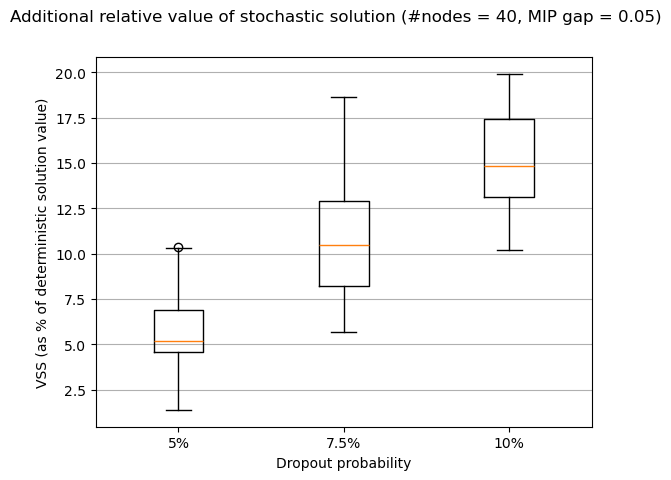

In [27]:
fig, ax = plt.subplots()

ax.boxplot(boxes)

fig.suptitle(f'Additional relative value of stochastic solution (#nodes = {D}, MIP gap = {G})')
ax.set_xlabel('Dropout probability')
ax.set_ylabel('VSS (as % of deterministic solution value)')

ax.yaxis.grid(True)
ax.set_xticks([1,2,3], labels=['5%','7.5%','10%'])

plt.show()

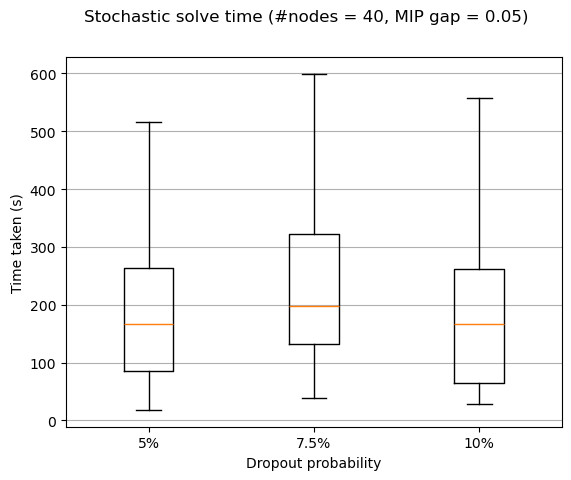

In [28]:
fig, ax = plt.subplots()

ax.boxplot(selected_time_taken, showfliers=False)

fig.suptitle(f'Stochastic solve time (#nodes = {D}, MIP gap = {G})')
ax.set_xlabel('Dropout probability')
ax.set_ylabel('Time taken (s)')

ax.yaxis.grid(True)
ax.set_xticks([1,2,3], labels=['5%','7.5%','10%'])

plt.show()

In [26]:
selected_time_taken

[[388.1420090198517,
  207.9792628288269,
  83.3264389038086,
  74.08534669876099,
  235.94370889663696,
  18.218897581100464,
  52.93201303482056,
  242.2371859550476,
  515.3008182048798,
  457.01304602622986,
  237.5338099002838,
  160.62858819961548,
  104.27803587913512,
  67.16534399986267,
  324.3888320922852,
  89.03756260871887,
  222.88633394241333,
  132.46690559387207,
  52.907296657562256,
  172.5340232849121,
  83.21527314186096,
  137.27722311019895,
  269.99089455604553,
  377.96931982040405,
  97.13597369194032,
  348.81640577316284,
  62.82054018974304,
  187.0041697025299,
  463.4833586215973,
  94.44796442985536],
 [76.69761753082275,
  135.76273822784424,
  204.62341237068176,
  109.102112531662,
  327.63083934783936,
  115.7337839603424,
  162.08979654312134,
  393.9489495754242,
  145.25883078575134,
  130.05397129058838,
  190.35758185386652,
  305.9392349720001,
  209.75842189788816,
  176.82554054260254,
  290.5227394104004,
  46.64112997055054,
  104.44648981